In [ ]:
import os, sys, subprocess

REPO = "https://github.com/jongmoonha/Signal_Processing_Practice.git"
DIR  = "Signal_Processing_Practice"

try:
    import google.colab  # Colab 전용 모듈
    if not os.path.isdir(DIR):
        subprocess.run(["git","clone",REPO], check=True)
    print('We are in Google Colab environment.')
    os.chdir('/content/'+DIR)
    print('Current working directory:', os.getcwd())

except ImportError:
    print('We are in a local environment, not Google Colab.')
    pass

## Filtering Practice

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import utils
plt.rc('font', size=20)

## 데이터 로드

In [3]:
fs = 1000

data = np.array(pd.read_csv('./data/data_sample_filtering.csv'))
print(np.shape(data))
print(data)

t = data[:,1]
v = data[:,2]

(10000, 3)
[[ 0.00000000e+00  1.00000000e-03  1.75747273e-01]
 [ 1.00000000e+00  2.00000000e-03  3.50404731e-01]
 [ 2.00000000e+00  3.00000000e-03  5.22890955e-01]
 ...
 [ 9.99700000e+03  9.99800000e+00 -3.50404731e-01]
 [ 9.99800000e+03  9.99900000e+00 -1.75747273e-01]
 [ 9.99900000e+03  1.00000000e+01 -6.85802208e-14]]


## 주파수 분석하기

진동 신호 (v) (샘플링주파수: fs) 에 대해 주파수 분석을 수행

지금 가지고 있는 주파수분석 함수를 활용 utils.fft_simple(v, fs)

주파수 분석 결과를 subplot으로 그리기 (상단: 시간영역 신호, 하단: 주파수영역 신호 - 0Hz에서 30Hz 확대)

(0.0, 30.0)

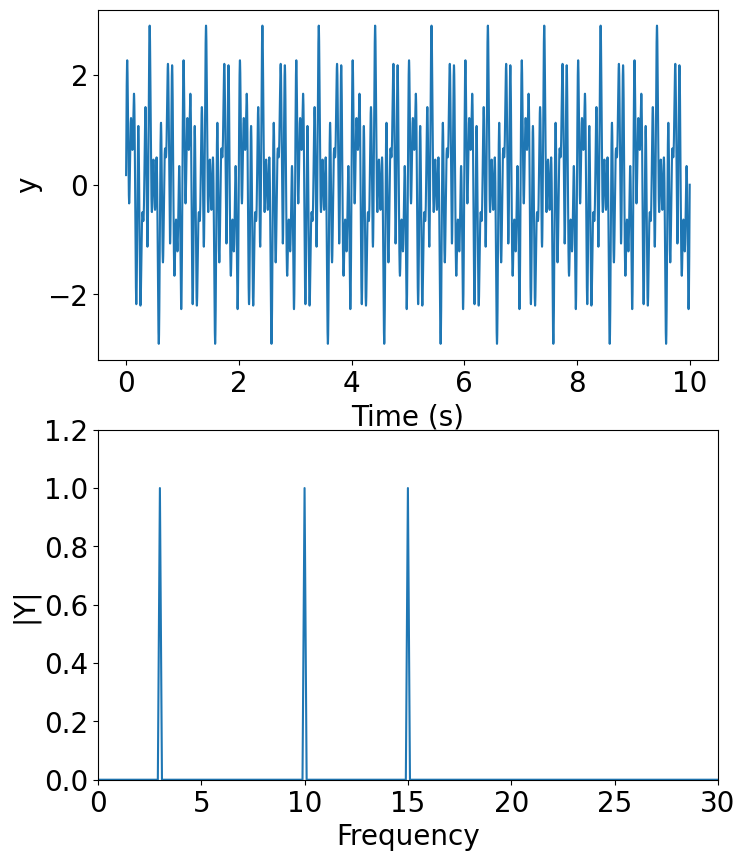

In [ ]:
f, A = utils.fft_simple(v,fs)

plt.figure(figsize=(8,10))
plt.subplot(211)
plt.plot(t,v);plt.xlabel('Time (s)');plt.ylabel('y')
plt.subplot(212)
plt.plot(f,A);plt.xlabel('Frequency');plt.ylabel('|Y|')
plt.ylim([0,1.2]);plt.xlim([0,30])

## 필터링하기

### Band-pass

1.

진동신호 (v) (샘플링 주파수 fs) 에 대해 밴드패스 필터링 수행 (범위 5Hz - 12Hz)

유저 함수를 사용하지 않고, 처음부터 코드 작성

수렴에 문제가 없도록 필터 오더를 잘 고려해서 (너무 높지 않게) 설정

결과를 subplot으로 출력 (상단: 시간영역 신호, 하단: 주파수영역 신호)

2.

진동신호 (v) (샘플링 주파수 fs) 에 대해 밴드패스 필터링 수행 (범위 5Hz - 12Hz)

utils.filtering(v, fs, Wn, ftype)를 활용 (ftype: 'band', 'high', 'low', Wn: np.array 형식 (기본 Hz 단위))

결과를 subplot으로 출력 (상단: 시간영역 신호, 하단: 주파수영역 신호)

In [ ]:
ftype='band'
Wn=np.array([5,12])
print(Wn)
v_filter = utils.filtering(v, fs, Wn, ftype)

[ 5 12]


(0.0, 30.0)

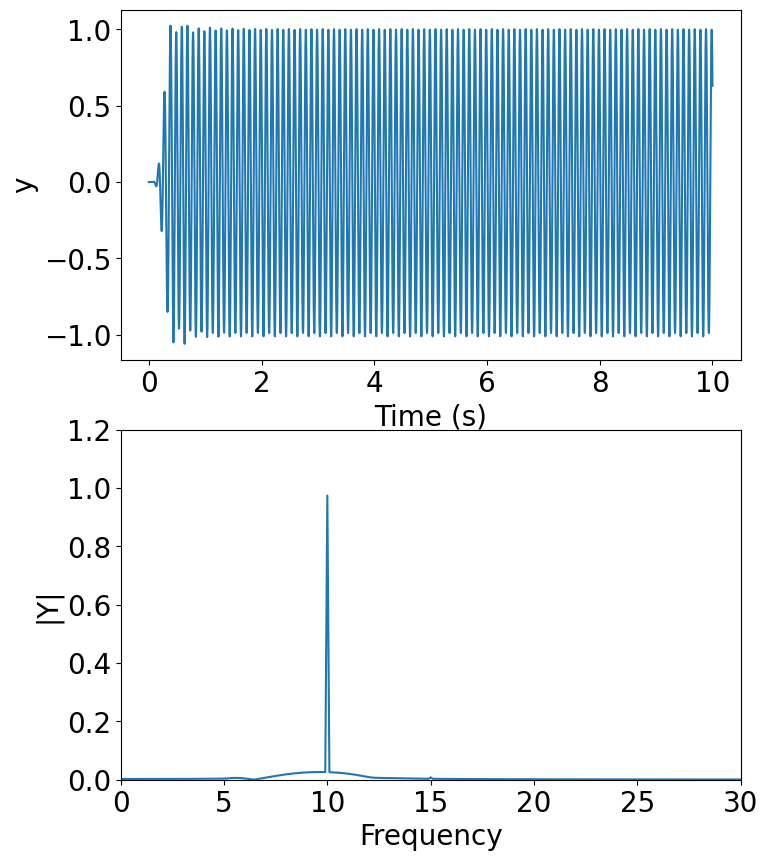

In [7]:
f_filter, A_filter = utils.fft_simple(v_filter,fs)

plt.figure(figsize=(8,10))
plt.subplot(211)
plt.plot(t,v_filter);plt.xlabel('Time (s)');plt.ylabel('y')
plt.subplot(212)
plt.plot(f_filter,A_filter);plt.xlabel('Frequency');plt.ylabel('|Y|')
plt.ylim([0,1.2]);plt.xlim([0,30])

### High-pass

In [8]:
ftype='high'
Wn=np.array([5])
print(Wn)
v_filter = utils.filtering(v, fs, Wn, ftype)

[5]


(0.0, 30.0)

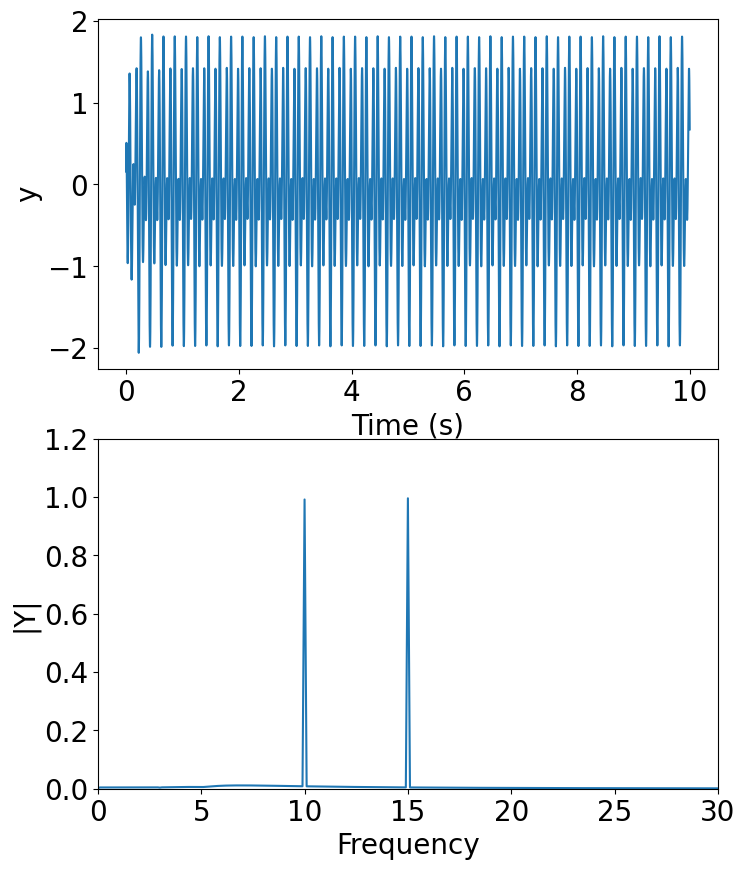

In [9]:
f_filter, A_filter = utils.fft_simple(v_filter,fs)

plt.figure(figsize=(8,10))
plt.subplot(211)
plt.plot(t,v_filter);plt.xlabel('Time (s)');plt.ylabel('y')
plt.subplot(212)
plt.plot(f_filter,A_filter);plt.xlabel('Frequency');plt.ylabel('|Y|')
plt.ylim([0,1.2]);plt.xlim([0,30])

### Low-pass

In [10]:
ftype='low'
Wn=np.array([5])
print(Wn)
v_filter = utils.filtering(v, fs, Wn, ftype)

[5]


(0.0, 30.0)

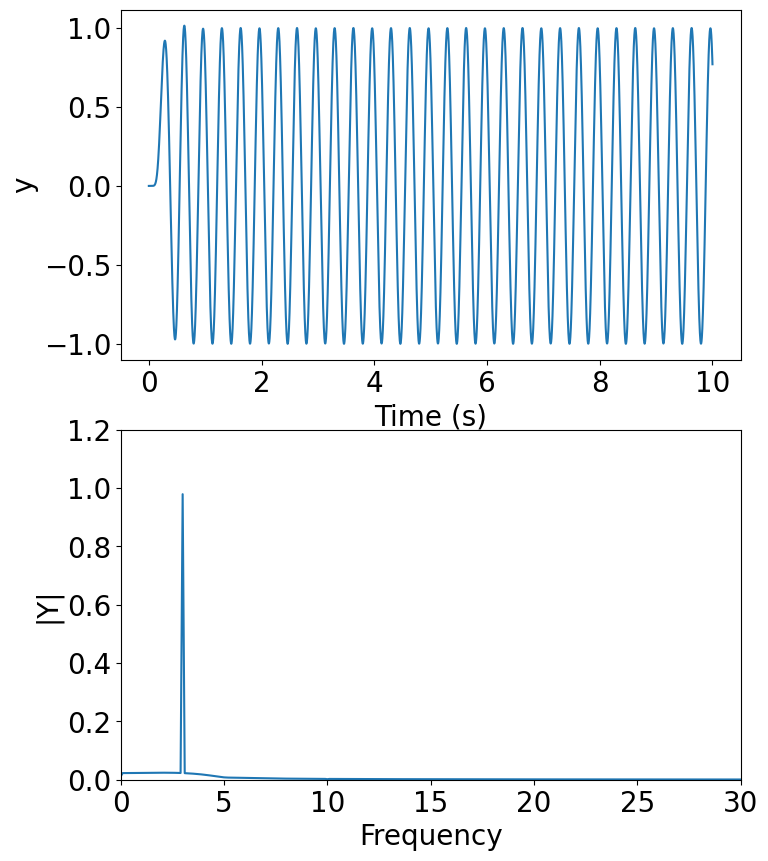

In [11]:
f_filter, A_filter = utils.fft_simple(v_filter,fs)

plt.figure(figsize=(8,10))
plt.subplot(211)
plt.plot(t,v_filter);plt.xlabel('Time (s)');plt.ylabel('y')
plt.subplot(212)
plt.plot(f_filter,A_filter);plt.xlabel('Frequency');plt.ylabel('|Y|')
plt.ylim([0,1.2]);plt.xlim([0,30])